In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('PlayasRosarito.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,23:00,277,268,6.47,13.7,15.9,80,1015.6,0.0,135.2
1,26/01/2018,00:00,254,248,8.77,16.3,15.3,98,1015.8,0.0,129.0
2,26/01/2018,01:00,300,308,14.17,28.6,14.8,89,1016.3,0.0,10.2
3,26/01/2018,02:00,307,301,12.43,26.4,14.3,80,1016.9,0.0,0.0
4,26/01/2018,03:00,307,294,11.73,24.2,13.9,79,1017.4,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1))
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,277,268,6.47,13.7,15.9,80,1015.6,0.0,135.2,2018-01-25 23:00:00
1,254,248,8.77,16.3,15.3,98,1015.8,0.0,129.0,2018-01-26 00:00:00
2,300,308,14.17,28.6,14.8,89,1016.3,0.0,10.2,2018-01-26 01:00:00
3,307,301,12.43,26.4,14.3,80,1016.9,0.0,0.0,2018-01-26 02:00:00
4,307,294,11.73,24.2,13.9,79,1017.4,0.0,0.0,2018-01-26 03:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.0,145.000000
mean,157.262069,161.275862,9.925034,22.893793,19.049655,33.944828,1015.888276,0.0,165.726897
std,121.274941,119.943765,7.918644,13.310028,5.387745,26.705643,2.651690,0.0,241.504195
min,2.000000,6.000000,0.370000,6.900000,10.000000,6.000000,1010.300000,0.0,0.000000
25%,56.000000,54.000000,3.980000,12.400000,15.200000,13.000000,1013.600000,0.0,0.000000
50%,77.000000,86.000000,6.810000,18.400000,18.600000,23.000000,1016.100000,0.0,0.200000
75%,296.000000,294.000000,14.790000,31.500000,23.100000,56.000000,1018.100000,0.0,259.300000
max,358.000000,357.000000,34.930000,61.100000,30.600000,98.000000,1020.900000,0.0,737.000000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
103,74,74,29.33,48.5,24.8,10,1014.3,0.0,0.0,2018-01-30 06:00:00
104,74,67,28.25,45.3,24.4,10,1013.9,0.0,0.0,2018-01-30 07:00:00
105,75,60,28.79,46.3,24.2,10,1013.5,0.0,0.0,2018-01-30 08:00:00
106,74,65,26.35,44.5,24.1,10,1013.3,0.0,0.0,2018-01-30 09:00:00
115,197,218,6.31,14.5,24.9,16,1015.1,0.0,540.2,2018-01-30 18:00:00
116,207,202,5.84,11.8,24.5,17,1014.2,0.0,463.3,2018-01-30 19:00:00


In [10]:
df.dtypes

DIRS               int64
DIRR               int64
VELS             float64
VELR             float64
TEMP             float64
HR                 int64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [11]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       157.262069
DIRR       161.275862
VELS         9.925034
VELR        22.893793
TEMP        19.049655
HR          33.944828
PB        1015.888276
PREC         0.000000
RADSOL     165.726897
dtype: float64

In [12]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

19.04965517241379

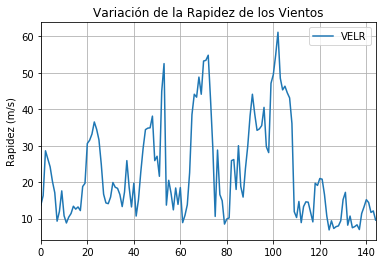

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELR.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

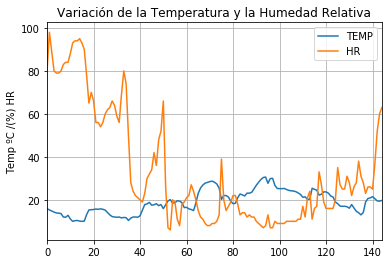

In [14]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

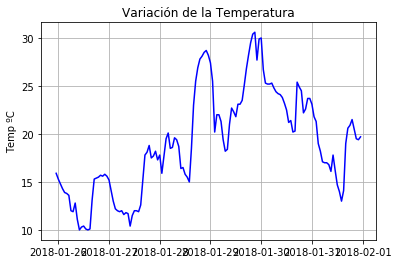

In [15]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

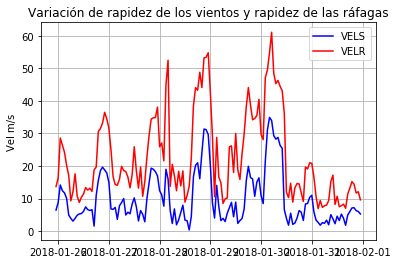

In [16]:
#i.Crear una gráfica que muestre la rapidez de los vientos y la rapidez de las ráfagas, como funciones del tiempo. 
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-");plt.legend(loc='upper right')
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-");plt.legend(loc='upper right')
plt.title("Variación de rapidez de los vientos y rapidez de las ráfagas")
plt.ylabel("Vel m/s")
plt.grid(True)
plt.show()
#El viento se comporta de manera que durante las horas cercanas a medio día 
#se observa una disminución en las velocidades, la cual aumenta considerablemente
#durante la noche y las horas de la madrugada.

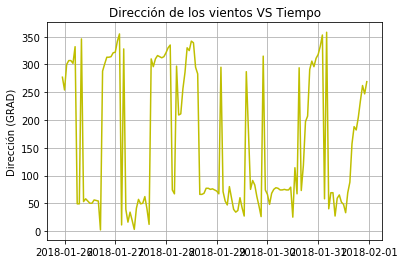

In [17]:
#ii.Crear una gráfica con la dirección de los vientos como función del tiempo y comentar sobre los vientos dominantes en el sitio de estudio.
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="y-")
plt.title("Dirección de los vientos VS Tiempo")
plt.ylabel("Dirección (GRAD)")
plt.grid(True)
plt.show()
#Se observa una alta tendencia de los vientos a dirigirse hacia el sureste. 

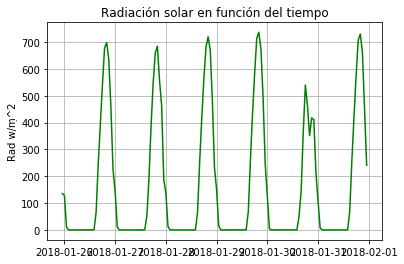

In [18]:
#iii.Muestre el comportamiento de la Radiación Solar como función del tiempo. 
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="g-")
plt.title("Radiación solar en función del tiempo")
plt.ylabel("Rad w/ṃ^2")
plt.grid(True)
plt.show()
#Se observa un comportamiento esperado pues existen altos niveles de radiación
#en momentos después de medio día y antes del anochecer. 

In [19]:
#iv. ¿Cuál es el lapso de temperatura diaria? (Diferencia entre la temperatura máxima y la mínima). 
df1=df[['TEMP']]
df1.max()-df1.min()

TEMP    20.6
dtype: float64

In [20]:
#v.¿Puedes comentar sobre la relación entre la temperatura y la humedad relativa?
#En el caso observado la temperatura varía muy poco respecto a la Humedad relativa la cual tiene grandes variaciones.

In [21]:
#vi.Realiza el análisis exploratorio de datos, que resuma el sitio estudiado (Usar la función describe() sobre tu data frame. 
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.0,145.000000
mean,157.262069,161.275862,9.925034,22.893793,19.049655,33.944828,1015.888276,0.0,165.726897
std,121.274941,119.943765,7.918644,13.310028,5.387745,26.705643,2.651690,0.0,241.504195
min,2.000000,6.000000,0.370000,6.900000,10.000000,6.000000,1010.300000,0.0,0.000000
25%,56.000000,54.000000,3.980000,12.400000,15.200000,13.000000,1013.600000,0.0,0.000000
50%,77.000000,86.000000,6.810000,18.400000,18.600000,23.000000,1016.100000,0.0,0.200000
75%,296.000000,294.000000,14.790000,31.500000,23.100000,56.000000,1018.100000,0.0,259.300000
max,358.000000,357.000000,34.930000,61.100000,30.600000,98.000000,1020.900000,0.0,737.000000
